In [1]:
%load_ext autoreload

In [2]:
%autoreload 1

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
# %aimport computeCost
import computeCost as cc

In [7]:
import gradientDescent as gd

## ==================== Part 1: Basic Function ====================

## ======================= Part 2: Plotting =======================

In [8]:
csv_data  = pd.read_csv('./ex1data1.txt', names=['population', 'profit'])

In [9]:
csv_data.head(10)

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [10]:
csv_data.shape

(97, 2)

In [11]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


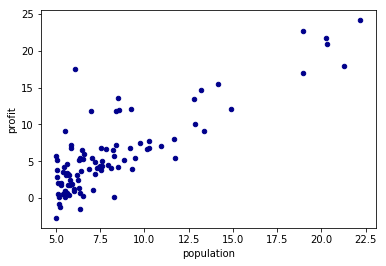

In [12]:
csv_data.plot(kind='scatter', x='population', y='profit',color='DarkBlue')

## =================== Part 3: Cost and Gradient descent ===================

In [13]:
m = csv_data.shape[0]

In [14]:
ones = np.ones((m,1))
x = csv_data.values[:,0:1]
y = csv_data.values[:,1:2]
X = np.concatenate((ones, x), axis=1)
theta = np.zeros((2,1))

### Some gradient descent settings

In [15]:
iterations = 1500
alpha = 0.01

### compute and display initial cost

In [16]:
J = cc.compute_cost(X, y, theta)
print('With theta = [0 ; 0]\nCost computed = %f' % J)
print('Expected cost value (approx) 32.07')

With theta = [0 ; 0]
Cost computed = 32.072734
Expected cost value (approx) 32.07


### further testing of the cost function

In [17]:
J = cc.compute_cost(X, y, np.array([[-1], [2]]))
print('With theta =[-1 ; 2]\nCost computed = %f' % J)
print('Expected cost value (approx) 54.24')

With theta =[-1 ; 2]
Cost computed = 54.242455
Expected cost value (approx) 54.24


### run gradient descent

In [18]:
theta_res, cost_hostory = gd.gradient_descent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent:')
print(theta_res)
print('Expected theta values (approx)')
print(' -3.6303\n  1.1664')

Theta found by gradient descent:
[[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx)
 -3.6303
  1.1664


In [19]:
J = cc.compute_cost(X, y, theta_res)
print('Finally, Cost computed = %f' % J)

Finally, Cost computed = 4.483388


### Plot the linear fit

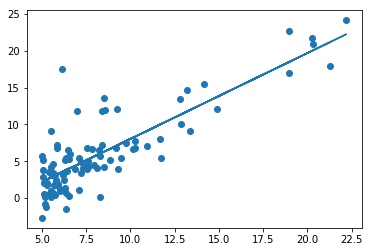

In [20]:
plt.scatter(csv_data['population'], csv_data['profit'])
plt.plot(X[:,1], np.dot(X, theta_res))

### Predict values for population sizes of 35,000 and 70,000

In [21]:
predict1 = (np.dot((np.array([[1], [3.5]])).T, theta_res) * 10000)[0,0]
predict2 = (np.dot((np.array([[1], [7]])).T, theta_res) * 10000)[0,0]

print('For population = 35,000, we predict a profit of %f' % predict1)
print('For population = 70,000, we predict a profit of %f' % predict2)

For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129


### visualize cost data

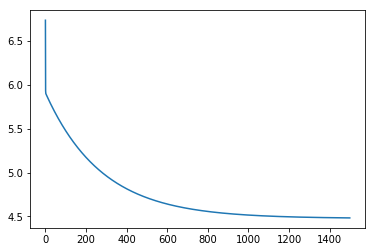

In [22]:
plt.plot(np.arange(iterations), cost_hostory)